# Explore here

In [7]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

sales_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
sales_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [2]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [8]:
sales_data["date"] = pd.to_datetime(sales_data["date"])
sales_data = sales_data.set_index("date")
sales_data.sample(10)

,sales
date,
2022-12-26 17:10:08.079328,345.908319
2023-07-16 17:10:08.079328,872.339239
2023-03-05 17:10:08.079328,519.631160
2022-11-26 17:10:08.079328,273.094894
2023-01-26 17:10:08.079328,430.230699
2023-03-18 17:10:08.079328,562.452358
2022-11-20 17:10:08.079328,252.079041
2023-01-11 17:10:08.079328,386.046416
2023-04-05 17:10:08.079328,604.152963


In [9]:
ts = sales_data["sales"]
ts.sample(10)

date
2022-11-17 17:10:08.079328    243.151049
2022-09-07 17:10:08.079328     66.013633
2022-10-23 17:10:08.079328    177.450587
2023-05-25 17:10:08.079328    731.314448
2023-05-05 17:10:08.079328    684.141454
2023-05-29 17:10:08.079328    746.601588
2023-08-06 17:10:08.079328    928.476091
2023-04-07 17:10:08.079328    612.140720
2022-12-26 17:10:08.079328    345.908319
2022-12-11 17:10:08.079328    308.877201
Name: sales, dtype: float64

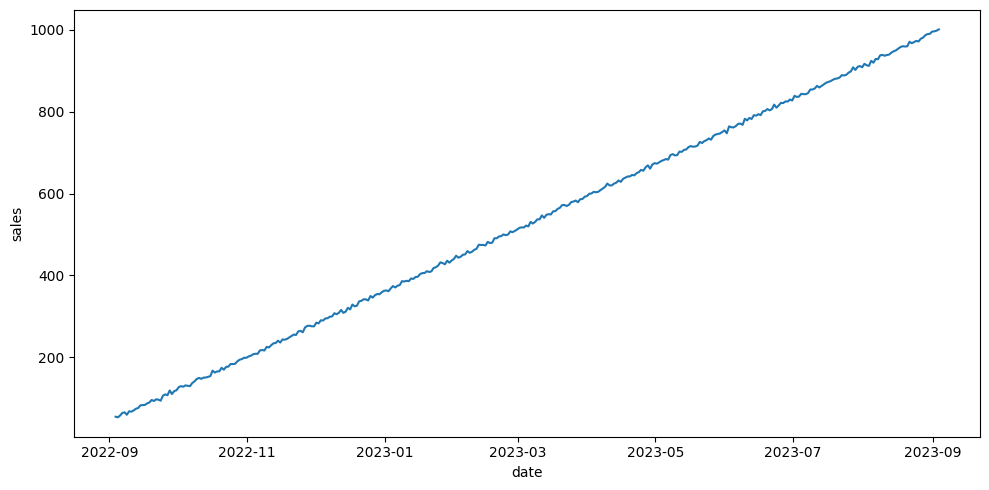

In [10]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [11]:
decomposition = seasonal_decompose(ts)
decomposition

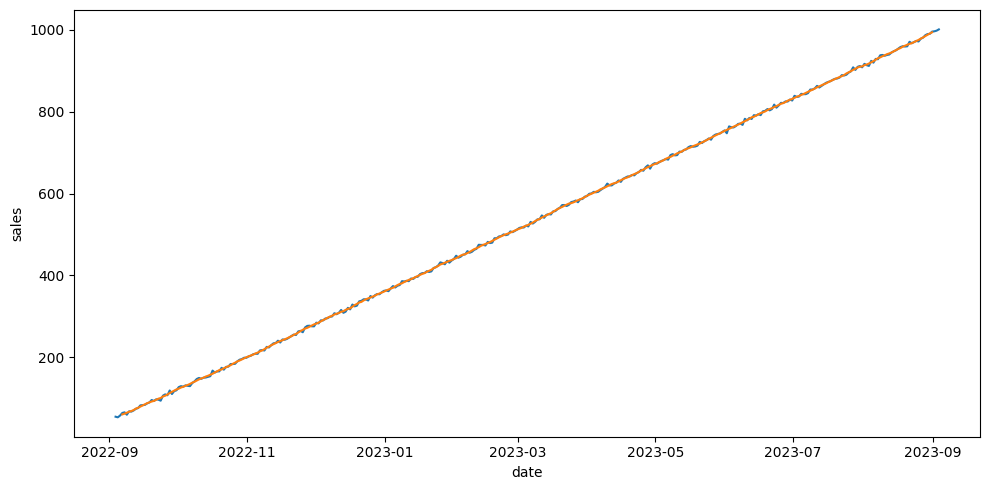

In [12]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

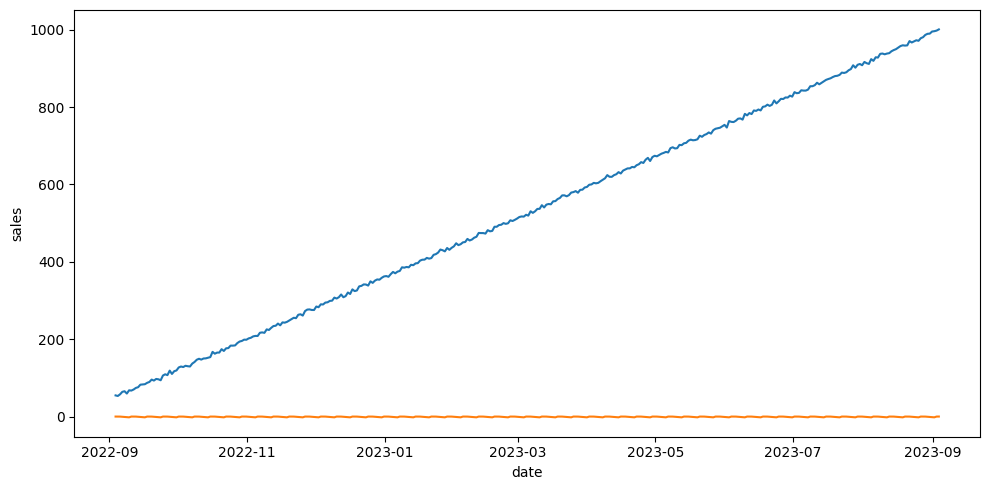

In [13]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [14]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

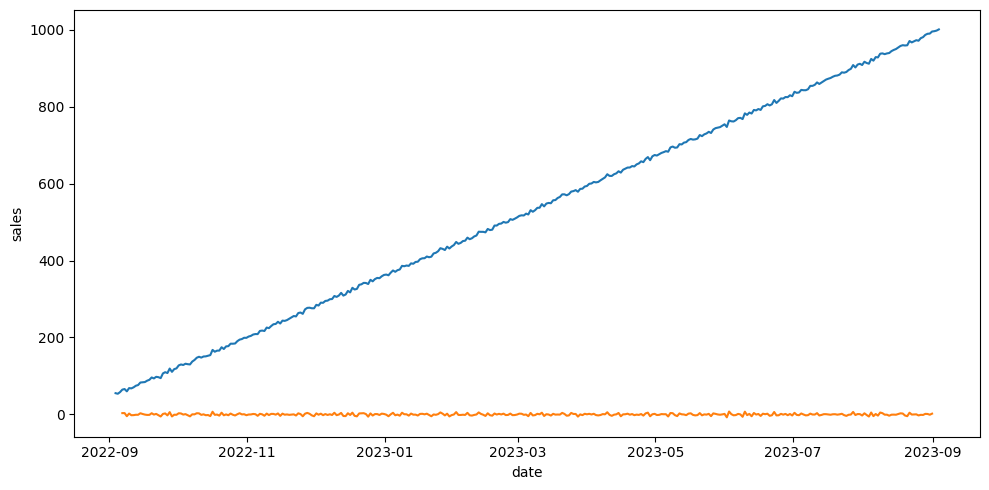

In [15]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

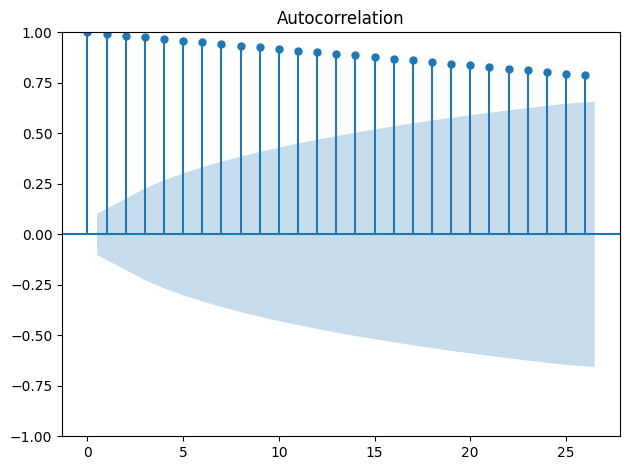

In [16]:
plot_acf(ts)

plt.tight_layout()

plt.show()

In [17]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [28]:
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.226
Date:                Sun, 22 Dec 2024   AIC                           2104.453
Time:                        05:19:30   BIC                           2116.153
Sample:                    09-03-2022   HQIC                          2109.103
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1194.486      0.000       0.998       1.002
ma.L1         -0.9996      0.679     -1.471      0.141      -2.331       0.332
sigma2        18.1401     12.421      1.460      0.1

In [30]:
sales_data["fitted"] = model_fit.fittedvalues

In [31]:
forecast = model_fit.forecast(steps=12)
print("Predicción a futuro:")
print(forecast)

Predicción a futuro:
2023-09-04 17:10:08.079328    1003.052927
2023-09-05 17:10:08.079328    1005.623068
2023-09-06 17:10:08.079328    1008.193209
2023-09-07 17:10:08.079328    1010.763350
2023-09-08 17:10:08.079328    1013.333489
2023-09-09 17:10:08.079328    1015.903628
2023-09-10 17:10:08.079328    1018.473766
2023-09-11 17:10:08.079328    1021.043903
2023-09-12 17:10:08.079328    1023.614040
2023-09-13 17:10:08.079328    1026.184176
2023-09-14 17:10:08.079328    1028.754311
2023-09-15 17:10:08.079328    1031.324446
Freq: D, Name: predicted_mean, dtype: float64


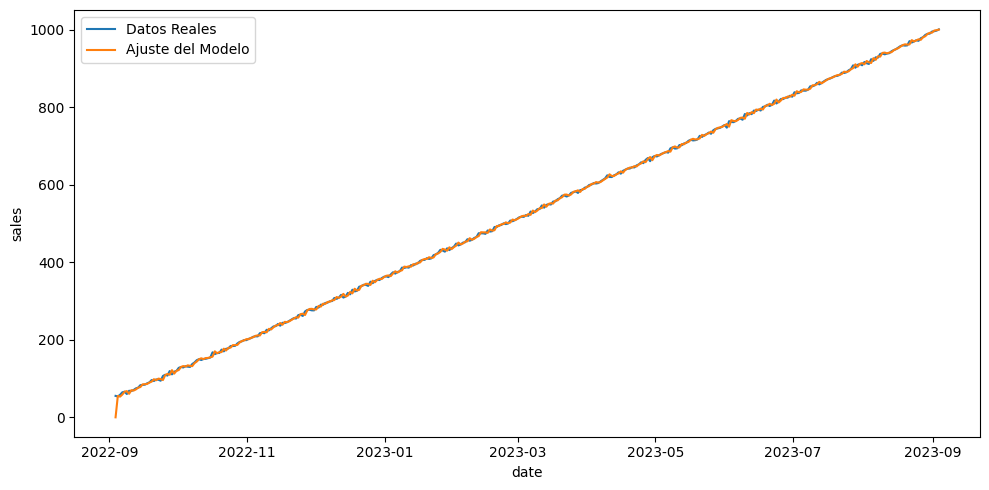

In [32]:
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=sales_data["sales"], label="Datos Reales")
sns.lineplot(data=sales_data["fitted"], label="Ajuste del Modelo")
plt.tight_layout()
plt.legend()
plt.show()